# Desafio Trilha de Ciência de Dados

In [266]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [267]:
df = pd.read_csv("titanic.csv").set_index("id_passageiro")
df.head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,numero_bilhete,preco_bilhete,cabine_numero,local_embarque
id_passageiro,,,,,,,,,,
1,False,3,M,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,True,1,F,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,True,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,True,1,F,35.0,1,0,113803,53.1000,C123,Southampton
5,False,3,M,35.0,0,0,373450,8.0500,NaN,Southampton


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sobreviveu              891 non-null    bool   
 1   classe_bilhete          891 non-null    int64  
 2   genero                  891 non-null    object 
 3   idade                   714 non-null    float64
 4   irmaos_conjuges_abordo  891 non-null    int64  
 5   pais_filhos_abordo      891 non-null    int64  
 6   numero_bilhete          891 non-null    object 
 7   preco_bilhete           891 non-null    float64
 8   cabine_numero           204 non-null    object 
 9   local_embarque          889 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 70.5+ KB


In [269]:
df.describe()

,classe_bilhete,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA

###  Visualize e entenda todas as colunas numéricas.

In [270]:
numerical = [
    "idade",
    "preco_bilhete",
    "irmaos_conjuges_abordo",
    "pais_filhos_abordo",
]

#### Perguntas guias para as categorias numéricas:

- Existem dados faltantes no seu conjunto?

**Resposta:** Sim, como mostrado no código abaixo, a coluna idade tem um total de 177 dados faltantes.

In [271]:
# Coleta de dados faltantes para as colunas numéricas
missing_data_size = df.loc[:,numerical].isna().sum()
missing_data_columns = ((missing_data_size[missing_data_size > 0]).sort_values(ascending=False).to_frame(name='Count'))
missing_data_columns = (missing_data_columns.assign(Column=missing_data_columns.index)).reset_index(drop=True)
missing_data_columns['Percent'] = missing_data_columns['Count']/df.shape[0]*100
missing_data_columns

,Count,Column,Percent
0,177,idade,19.86532


<Axes: ylabel='id_passageiro'>

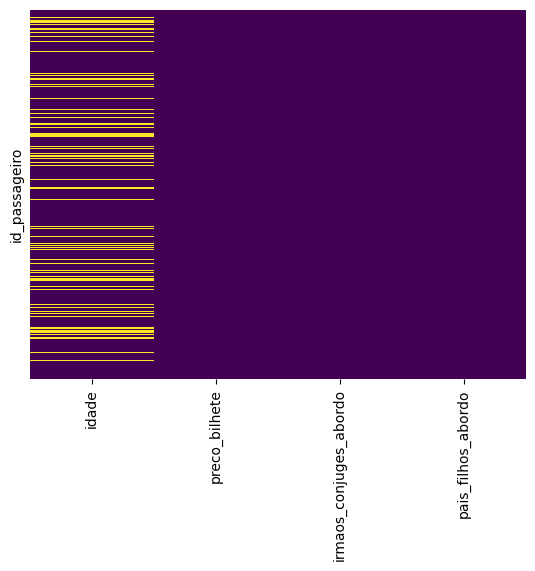

In [272]:
# Visualização dos dados faltantes para cada coluna numérica
sns.heatmap(data=df[numerical].isna(), cbar=False, cmap="viridis", yticklabels=False)

- Quais as suas distribuições?

**Resposta:** Abaixo temos a distribuição de cada coluna especificada como variável numérica no formato de um histograma. Podemos notar que a maioria das idades estão 20 e 40 anos de idade, assim como a maioria dos bilhetes tiveram seu preço menor que R$ 100,00. Podemos notar também que mais da metade dos passageiros levaram nenhum ou apenas um irmão ou cônjuge. Também ressalta-se que mais da metade dos passageiros levaram nenhum ou um pais/filhos.

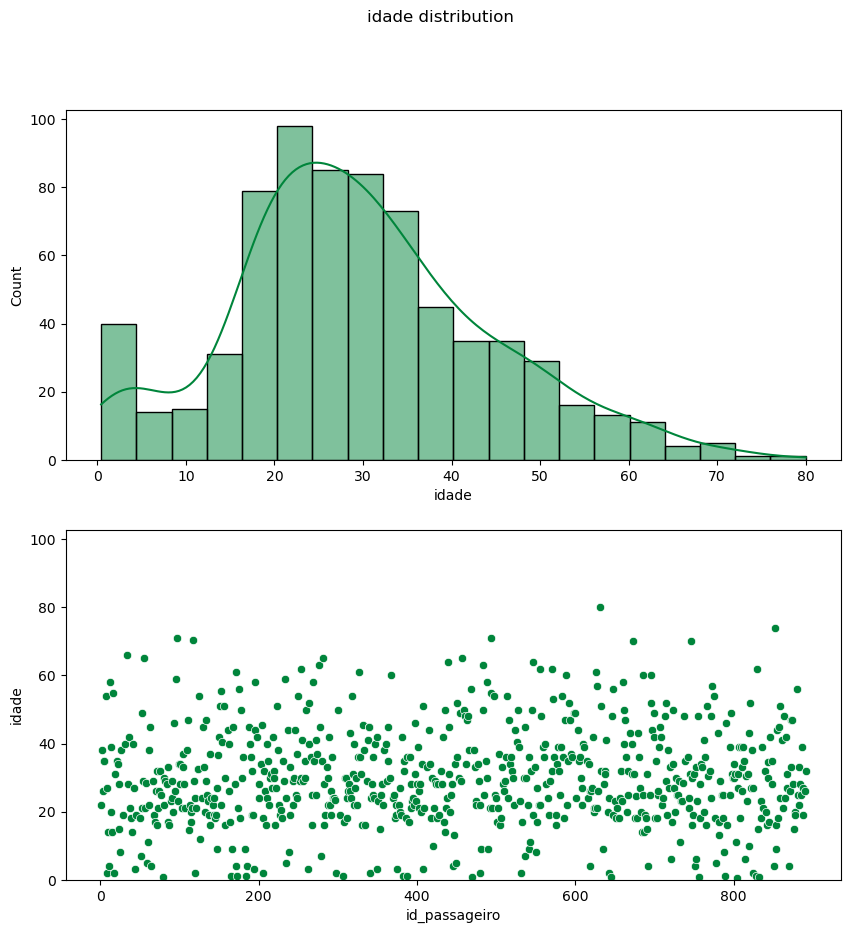

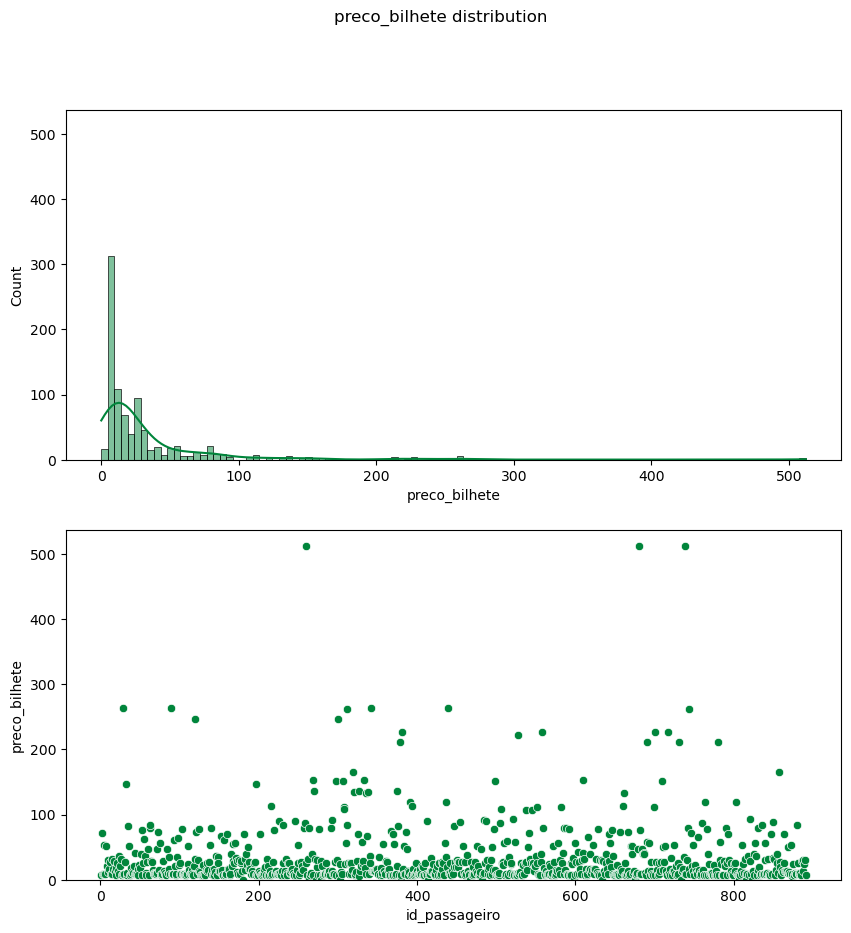

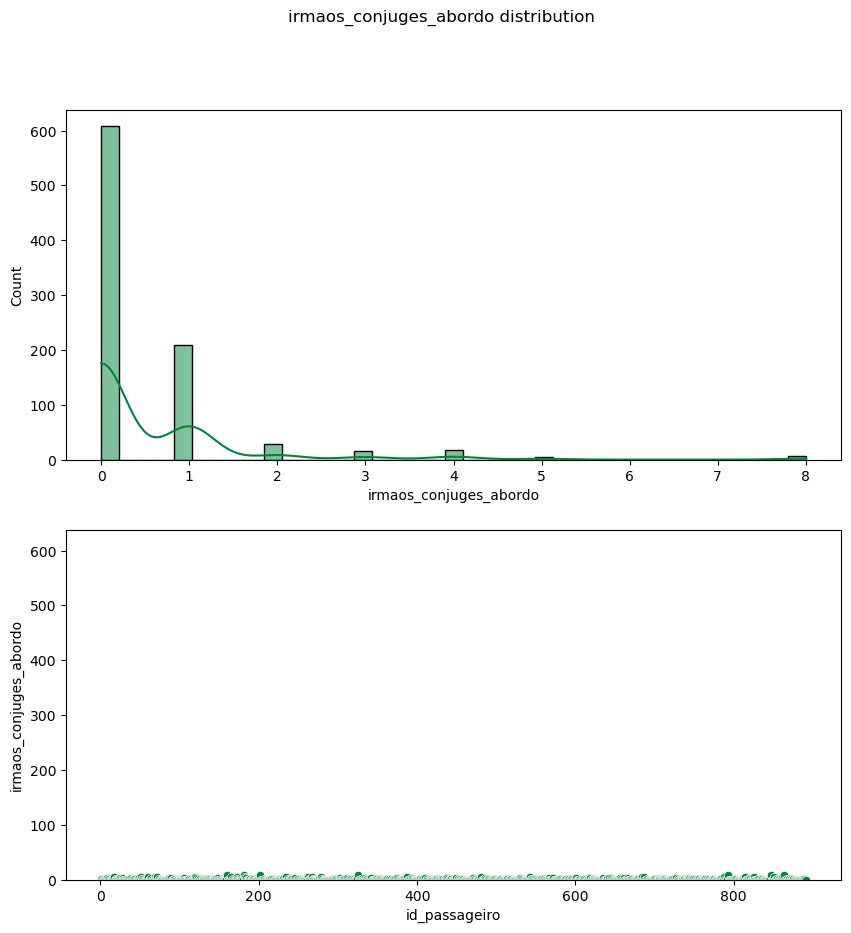

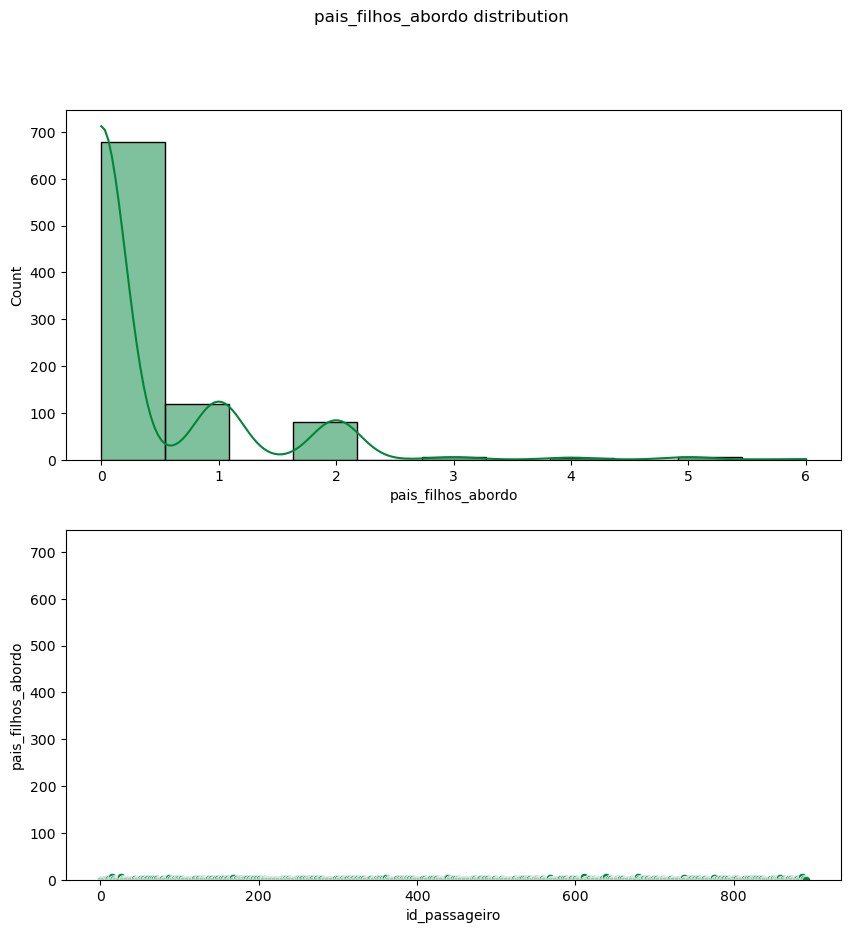

In [273]:
# Plotar o gráfico de distribuição de todas as colunas numéricas
def plot_distribution_discret_variables(df, feature):
  fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharey=True)
  fig.suptitle(f'{feature} distribution')
  sns.histplot(ax=axes[0], x=f"{feature}", data=df, color="#00853B", kde=True)
  sns.scatterplot(ax=axes[1], data=df[feature], color="#00853B")
  plt.show()

plot_distribution_discret_variables(df, 'idade')
plot_distribution_discret_variables(df, 'preco_bilhete')
plot_distribution_discret_variables(df, 'irmaos_conjuges_abordo')
plot_distribution_discret_variables(df, 'pais_filhos_abordo')

- Temos outliers neste subconjunto? (utilize a definição numérica de outliers apresentado na trilha para fazer essa verificação)

**Resposta:** Sim, o resultado abaixo mostra a quantidade de dados faltantes para cada coluna analisada, podemos notar que todas tem uma quantidade de dados faltantes.
O código abaixo utilizou o método utilizando z_score para identificar os outliers, definindo o threshold como 3 para limitar os valores aceitáveis de desvio padrão.

In [274]:
# Coleta de outliers nas colunas numéricas
def get_outliers(df):
  outliers = []

  for column in numerical:
    data = dict(df[column].items())
        
    mean = np.mean(pd.Series(data.values()))
    std = np.std(pd.Series(data.values()))
    thresh = 3

    # Para cada valor dentro da coluna especificada, calcula se está fora do limite do threshold, se sim, é uma anomalia.
    for id, value in data.items():
      z_score = (value - mean) / std

      if abs(z_score) > thresh and id not in outliers:
          outliers.append(id)

  return outliers
    
outliers = get_outliers(df)
len(outliers)

66

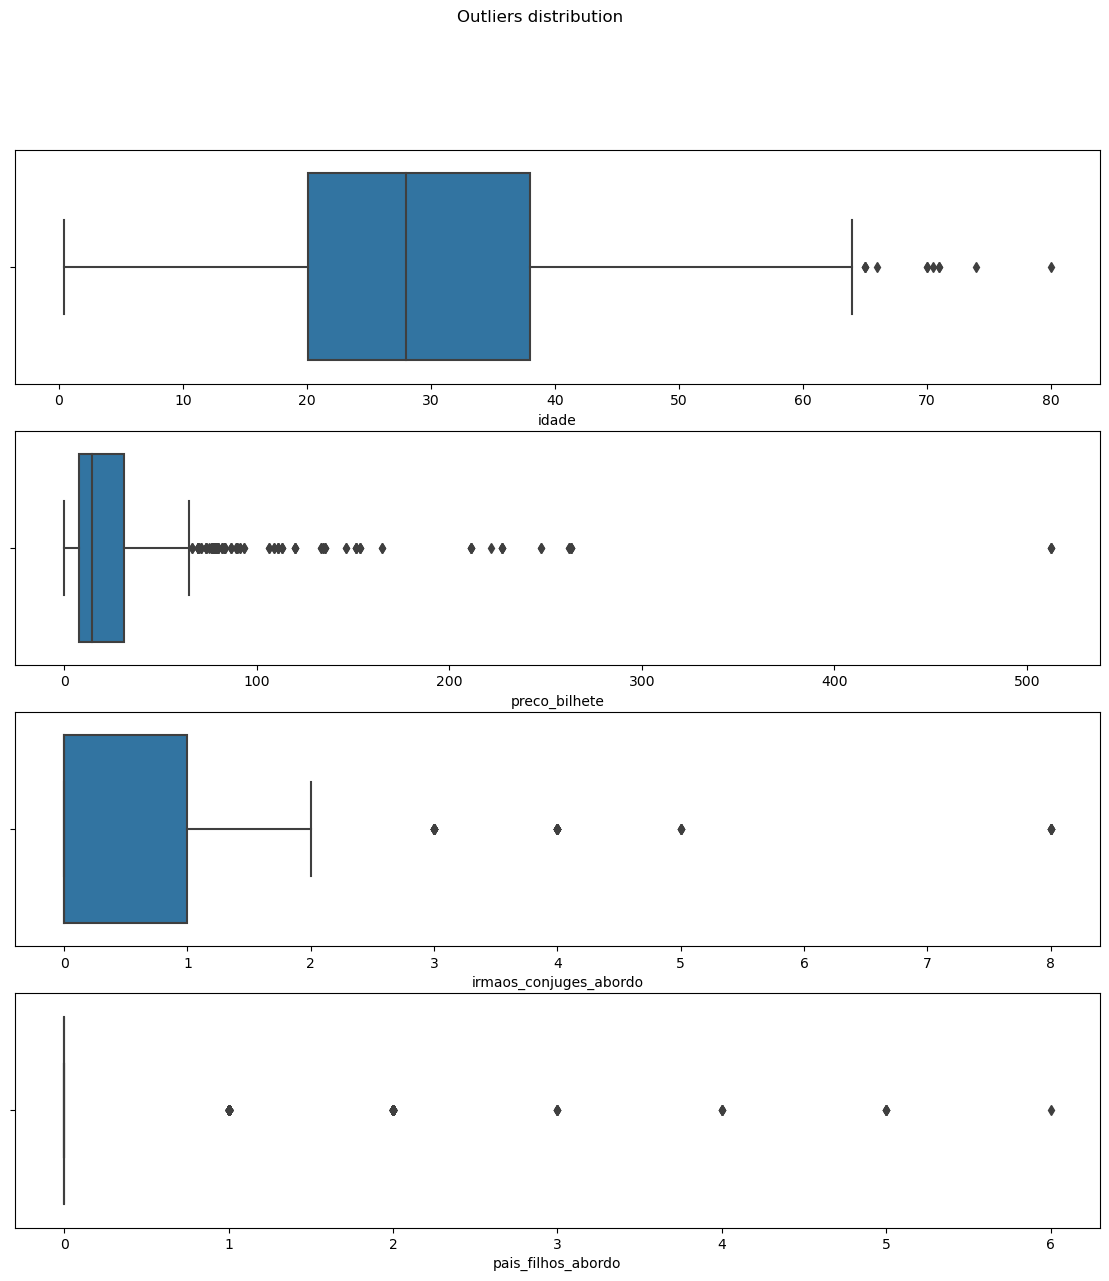

In [275]:
# Plotagem de outliers utilizando boxplot
fig, axes = plt.subplots(4, 1, figsize=(14, 14), sharey=True)
fig.suptitle(f'Outliers distribution')
sns.boxplot(ax=axes[0], x=df['idade'], orient='h')
sns.boxplot(ax=axes[1], x=df['preco_bilhete'], orient='h')
sns.boxplot(ax=axes[2], x=df['irmaos_conjuges_abordo'], orient='h')
sns.boxplot(ax=axes[3], x=df['pais_filhos_abordo'], orient='h')
plt.show()

- Existe alguma correlação entre essas variáveis numéricas? (não precisa olhar para outras categorias no momento)

**Resposta:** Abaixo temos o heatmap de correlação entre as variáveis numéricas, a partir dele, podemos ver que as colunas irmaos_conjuges_abordo e pais_filhos_abordo tem um maior índice de correlação, o que mostra que possivelmente uma pessoa levar alguém da família pode causar ela levar outros. Assim como temos correlações negativas, entre as colunas idade, irmaos_conjuges_abordo e pais_filhos_abordo o que mostra que essas variáveis realmente tendem a não estarem relacionada de forma alguma.

<Axes: >

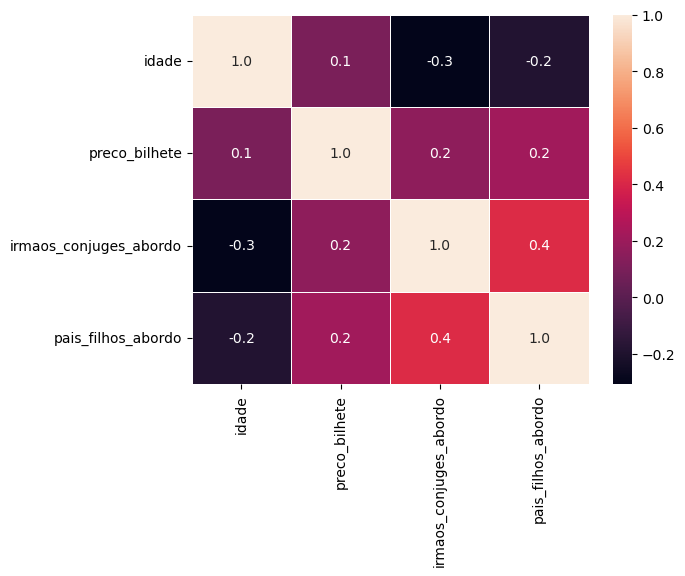

In [276]:
correlation = df[numerical].corr()
sns.heatmap(correlation, annot=True, fmt=".1f", linewidths=.6)

###  Visualize e entenda todas as colunas categóricas.

In [277]:
categorical = [
    "classe_bilhete",
    "genero",
    "numero_bilhete",
    "cabine_numero",
    "local_embarque",
    "sobreviveu",
]

https://seaborn.pydata.org/tutorial/categorical.html

#### Perguntas guias para as categorias categóricas:

- Existem dados faltantes no seu conjunto?

**Resposta:** Sim, há dados faltantes, abaixo temos o código no qual realiza a busca de dados faltantes.

In [278]:
# Coleta de dados faltantes para as colunas numéricas
missing_data_size = df.loc[:,categorical].isna().sum()
missing_data_columns = ((missing_data_size[missing_data_size > 0]).sort_values(ascending=False).to_frame(name='Count'))
missing_data_columns = (missing_data_columns.assign(Column=missing_data_columns.index)).reset_index(drop=True)
missing_data_columns['Percent'] = missing_data_columns['Count']/df.shape[0]*100
missing_data_columns

,Count,Column,Percent
0,687,cabine_numero,77.104377
1,2,local_embarque,0.224467


<Axes: ylabel='id_passageiro'>

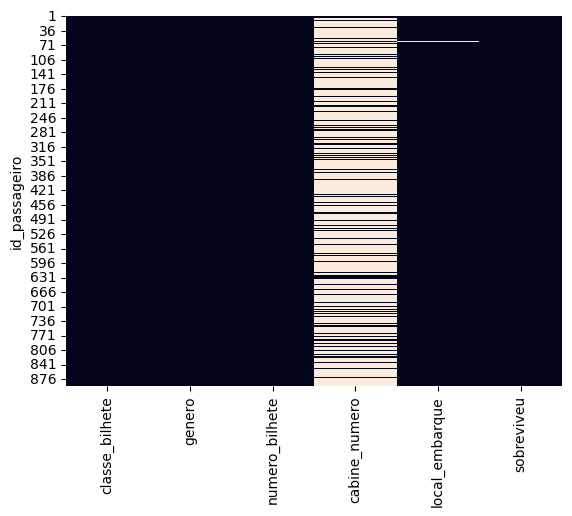

In [279]:
# Visualização dos dados faltantes para cada coluna numérica
sns.heatmap(data=df[categorical].isna(), cbar=False)

- Conseguimos extrair alguma informação nas colunas `numero_bilhete` e `cabine_numero`? ([Dica](https://pt.wikipedia.org/wiki/Instala%C3%A7%C3%B5es_da_primeira_classe_do_RMS_Titanic))

**Resposta:** A coluna cabine_número, é formada por uma letra, pertencente ao grupo de letras que representam os conveses do navio, seguida por uma sequencia de números, que juntos representam a informação de identificação da cabine.

In [280]:
# Conjunto de dados da coluna cabine_numero
df[df['cabine_numero'].isna() == False].head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,numero_bilhete,preco_bilhete,cabine_numero,local_embarque
id_passageiro,,,,,,,,,,
2,True,1,F,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
4,True,1,F,35.0,1,0,113803,53.1000,C123,Southampton
7,False,1,M,54.0,0,0,17463,51.8625,E46,Southampton
11,True,3,F,4.0,1,1,PP 9549,16.7000,G6,Southampton
12,True,1,F,58.0,0,0,113783,26.5500,C103,Southampton


In [281]:
# Conjunto de dados da coluna numero_bilhete
df["numero_bilhete"].head()

id_passageiro
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: numero_bilhete, dtype: object

- Existe alguma casualidade ou correlação entre as categorias?

**Resposta:** Sim, podemos notar que a correlação mais importante é a entre as colunas sobreviveu e genero, mostrando que uma porcentagem dos sobreviventes está associada a um genero específico.

In [282]:
# Criação de um dataframe auxiliar para manipular os dados e coletar a correlação entre as variáveis categóricas
df_categorical = df[categorical]
df_categorical.head()

,classe_bilhete,genero,numero_bilhete,cabine_numero,local_embarque,sobreviveu
id_passageiro,,,,,,
1,3,M,A/5 21171,NaN,Southampton,False
2,1,F,PC 17599,C85,Cherbourg,True
3,3,F,STON/O2. 3101282,NaN,Southampton,True
4,1,F,113803,C123,Southampton,True
5,3,M,373450,NaN,Southampton,False


In [283]:
# Codificação dos dados da coluna sobreviveu
df_categorical['sobreviveu'] = df_categorical['sobreviveu'].replace([False, True], [0, 1])
df_categorical['sobreviveu'].head()

C:\Users\andreina_mendes\AppData\Local\Temp\ipykernel_14532\3932584103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['sobreviveu'] = df_categorical['sobreviveu'].replace([False, True], [0, 1])


id_passageiro
1    0
2    1
3    1
4    1
5    0
Name: sobreviveu, dtype: int64

In [284]:
# Codificação dos dados da coluna genero
df_categorical['genero'] = df_categorical['genero'].replace(['M', 'F'], [0, 1])
df_categorical['genero'].head()

C:\Users\andreina_mendes\AppData\Local\Temp\ipykernel_14532\2479989861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['genero'] = df_categorical['genero'].replace(['M', 'F'], [0, 1])


id_passageiro
1    0
2    1
3    1
4    1
5    0
Name: genero, dtype: int64

In [285]:
# Verificação dos locais de embarque existentes
df_categorical['local_embarque'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [286]:
# Codificação dos dados da coluna local_embarque
df_categorical['local_embarque'] = df_categorical['local_embarque'].replace(['Southampton', 'Cherbourg', 'Queenstown'], [1, 2, 3])
df_categorical['local_embarque'].head()

C:\Users\andreina_mendes\AppData\Local\Temp\ipykernel_14532\3005172984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['local_embarque'] = df_categorical['local_embarque'].replace(['Southampton', 'Cherbourg', 'Queenstown'], [1, 2, 3])


id_passageiro
1    1.0
2    2.0
3    1.0
4    1.0
5    1.0
Name: local_embarque, dtype: float64

In [287]:
# Remoção das colunas numero_bilhete e cabine_numero
df_categorical.pop('numero_bilhete')
df_categorical.pop('cabine_numero')

id_passageiro
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: cabine_numero, Length: 891, dtype: object

In [288]:
# Dataframe resultante
df_categorical.head()

,classe_bilhete,genero,local_embarque,sobreviveu
id_passageiro,,,,
1,3,0,1.0,0
2,1,1,2.0,1
3,3,1,1.0,1
4,1,1,1.0,1
5,3,0,1.0,0


<Axes: >

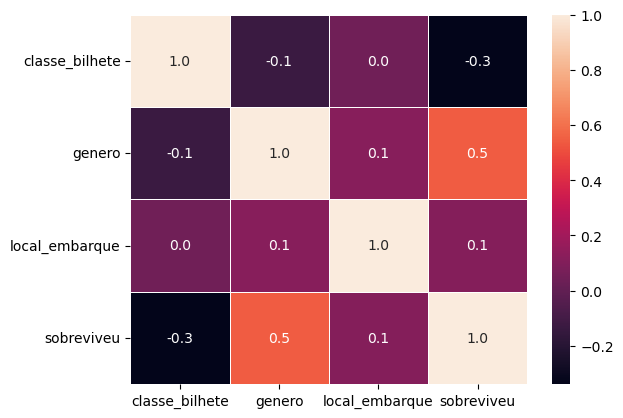

In [289]:
# Cálculo e plotagem da correlação entre as variáveis categóricas
sns.heatmap(df_categorical.corr(), annot=True, fmt=".1f", linewidths=.6)

- Existe alguma relação entre a `classe_bilhete` e o `cabine_numero`?

**Resposta:** Sim, pois a distribuição de passagerios dentro do navio estava associada a classe do bilhete comprado, cada cabine é referenciada utilizando o convés, que é determinado inicialmente pela classe, juntamente com um número para diferenciar cada cabine dentro de um mesmo convés, logo, dependendo da classe em que o passageiro esteja essa letra associada ao convés, irá ser diferente, por exemplo, um passageiro de 1º classe irá ter seu número de cabine iniciando com a letra pertencente a algum convés entre A e F, como definido nas regras do navio.

In [290]:
# Criação de um dataframe auxiliar para manipulação das colunas classe_bilhete e cabine_numero
df_relation = df[df['cabine_numero'].notna()][['classe_bilhete', 'cabine_numero']]
df_relation

,classe_bilhete,cabine_numero
id_passageiro,,
2,1,C85
4,1,C123
7,1,E46
11,3,G6
12,1,C103
...,...,...
872,1,D35
873,1,B51 B53 B55
880,1,C50


In [291]:
# Separação da informação do convés da coluna cabine_numero
df_conves = df_relation['cabine_numero'].apply(lambda x: x[0])
df_conves = pd.DataFrame.from_records(df_conves.values, columns=['conves']).set_index(df_relation.index)
df_conves

,conves
id_passageiro,
2,C
4,C
7,E
11,G
12,C
...,...
872,D
873,B
880,C


In [292]:
# União da coluna conves no df2
df_relation = df_relation.assign(conves=df_conves)
df_relation.head()

,classe_bilhete,cabine_numero,conves
id_passageiro,,,
2,1,C85,C
4,1,C123,C
7,1,E46,E
11,3,G6,G
12,1,C103,C


In [293]:
# Conveses para cada a 1º classe
df_relation[df_relation['classe_bilhete'] == 1].count()

classe_bilhete    176
cabine_numero     176
conves            176
dtype: int64

In [294]:
# Conveses para cada a 2º classe
df_relation[df_relation['classe_bilhete'] == 2].count()

classe_bilhete    16
cabine_numero     16
conves            16
dtype: int64

In [295]:
# Conveses para cada a 3º classe
df_relation[df_relation['classe_bilhete'] == 3].count()

classe_bilhete    12
cabine_numero     12
conves            12
dtype: int64

#### Perguntas chave para as categorias categóricas:

- Há alguma influência de pertencer a algum grupo de alguma cabine na sua sobrevivência?

**Resposta:** Sim, entre os sobreviventes a maioria está localizada nos conveses B, C, D e E, uma hipótese válida seria que isto aconteceu por uma questão de logística de escape dada a infraestrutura do navio e o posicionamento dos botes disponíveis.

In [296]:
# Aquisição de todos os valores de cabine não nulos.
cabin_not_null = df[(df['sobreviveu'] == True) & (df['cabine_numero'].notna())].loc[:,['sobreviveu', 'cabine_numero']]
cabin_not_null

,sobreviveu,cabine_numero
id_passageiro,,
2,True,C85
4,True,C123
11,True,G6
12,True,C103
22,True,D56
...,...,...
863,True,D17
872,True,D35
880,True,C50


In [297]:
# Separação da informação do convés da coluna cabine_numero
df_conves = cabin_not_null['cabine_numero'].apply(lambda x: x[0])
df_conves = pd.DataFrame.from_records(df_conves.values, columns=['conves']).set_index(cabin_not_null.index)
df_conves

,conves
id_passageiro,
2,C
4,C
11,G
12,C
22,D
...,...
863,D
872,D
880,C


In [298]:
# Remoção da coluna cabine_numero
cabin_not_null.pop('cabine_numero')

id_passageiro
2       C85
4      C123
11       G6
12     C103
22      D56
       ... 
863     D17
872     D35
880     C50
888     B42
890    C148
Name: cabine_numero, Length: 136, dtype: object

In [299]:
# União da coluna conves no df2
cabin_not_null = cabin_not_null.assign(conves=df_conves)
cabin_not_null

,sobreviveu,conves
id_passageiro,,
2,True,C
4,True,C
11,True,G
12,True,C
22,True,D
...,...,...
863,True,D
872,True,D
880,True,C


In [300]:
group_conves = cabin_not_null.groupby('conves')['sobreviveu'].count().reset_index()
group_conves

# pd.DataFrame.from_records()

,conves,sobreviveu
0,A,7
1,B,35
2,C,35
3,D,25
4,E,24
5,F,8
6,G,2


<Axes: xlabel='conves', ylabel='sobreviveu'>

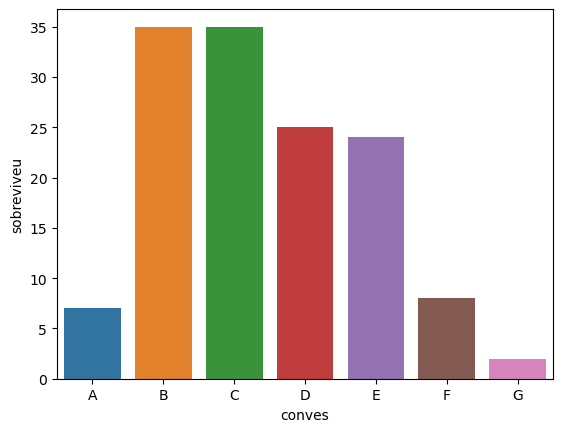

In [301]:
sns.barplot(data=group_conves, x='conves', y='sobreviveu')

- Há algum padrão no `numero_bilhete`?

**Resposta:** Não há padrão.

In [302]:
df['numero_bilhete'].head()

id_passageiro
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: numero_bilhete, dtype: object

- Há algum padrão na `cabine_numero`?

**Resposta:** As cabines seguem o padrão convés+número da cabine, exemplo C85, E46, e isto vai está de acordo com a distribuição de conveses para cada classe.

In [303]:
# Pega todos os dados não nulos para o número de cabines.
non_null = df[~df['cabine_numero'].isnull()]
non_null['cabine_numero']

id_passageiro
2              C85
4             C123
7              E46
11              G6
12            C103
          ...     
872            D35
873    B51 B53 B55
880            C50
888            B42
890           C148
Name: cabine_numero, Length: 204, dtype: object

## Perguntas do Desafio:

- Qual o fator que foi mais importante e menos importante para determinar a sobrevivência para esta população?

**Resposta:** O fator mais importante foi o genero e a idade, nas células abaixo será mostrada que 72% desta amostra sobreviveu. E o fator menos importante foi o local de embarque dos passageiros, pois este não teve influência no momento do desastre.

- Você pode dizer que houve alguma influência do poder aquisitivo na sobrevivência do acidente?

**Resposta:** Sim, pois 67% das pessoas que pagaram um bilhete acima de 10.000 sobreviveram.

In [304]:
df['preco_bilhete'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: preco_bilhete, dtype: float64

In [305]:
# Filtra o dataframe apenas para os dados dos sobreviventes e após isso faz um agrupamento para classe_bilhete contando quantos dados há para cada classe.
df[df['preco_bilhete'] > 14.454200].query("sobreviveu == True").shape[0]/df[df['sobreviveu'] == True].shape[0]*100

67.2514619883041

- O protocolo marítimo da época do Titanic tinha foco em dar prioridade a crianças e mulheres, analisando os dados podemos dizer se este protocolo foi seguido?


**Resposta:** Sim, pois 72% das mulheres e crianças sobreviveram.

In [306]:
# Coletar a quantidade de todas as mulheres e crianças com idade <= 12
all_woman_children = df[(df['genero'] == 'F') | (df['idade'] <= 12)].shape[0]
all_woman_children

351

In [307]:
# Coletar a quantidade de todas as mulheres e crianças com idade <= 12 que sobreviveram
survived_woman_children = df[(df['genero'] == 'F') | (df['idade'] <= 12)].query("sobreviveu == True").shape[0]
survived_woman_children

254

In [308]:
survived_woman_children/all_woman_children*100

72.36467236467237

- Ter uma família no barco influenciou negativamente ou positivamente para a sua sobrevivência?

**Resposta:** Influenciou positivamente já que 51% das pessoas com familiares sobreviveram em contrapartida aos 30% sem familiares que sobreviveram, mas é importante ressaltar que estes resultados possam ter sido influenciados por outros requisitos, além de ter ou não família no navio.

In [309]:
# Dados dos que sobreviveram e tinham família
with_family = df.loc[(df['irmaos_conjuges_abordo'] > 0) | (df['pais_filhos_abordo'] > 0)]
survived_with_family = with_family.query('sobreviveu == True').shape[0]/with_family.shape[0]
round(survived_with_family, 2)*100

51.0

In [310]:
# Dados dos que sobreviveram e não tinham família
without_family = df.loc[(df['irmaos_conjuges_abordo'] == 0) & (df['pais_filhos_abordo'] == 0)]
survived_without_family = without_family.query('sobreviveu == True').shape[0]/without_family.shape[0]
round(survived_without_family, 2)*100

30.0

- Qual o perfil de quem não sobreviveu? E qual é o perfil de quem sobreviveu? Entenda Perfil como: Gênero, Idade e Classe Social. Caso você identifique alguma nova característica pode adicioná-la ao perfil.

**Resposta:** Dentre os sobreviventes podemos ressaltar que estes estavam bem distribuídos entre as classes e que sua maioria está entre mulheres. Podemos ressaltar também que suas idades estão contidas em sua maioria, no intervalo de 20 a 40 anos.

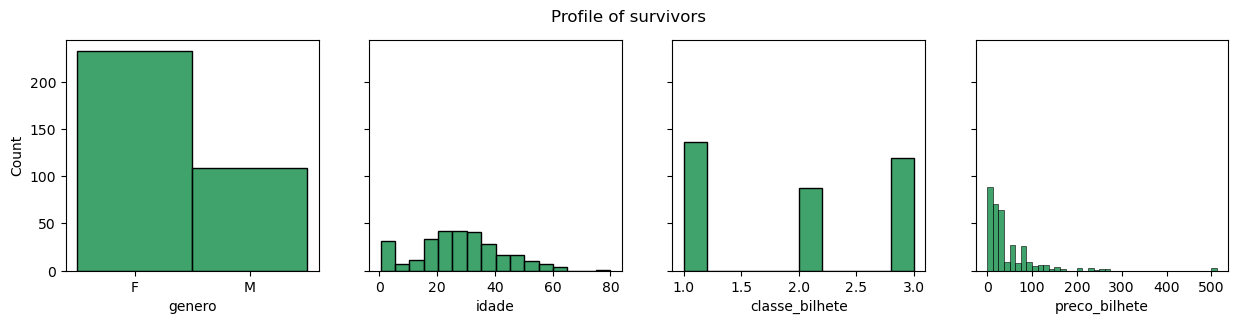

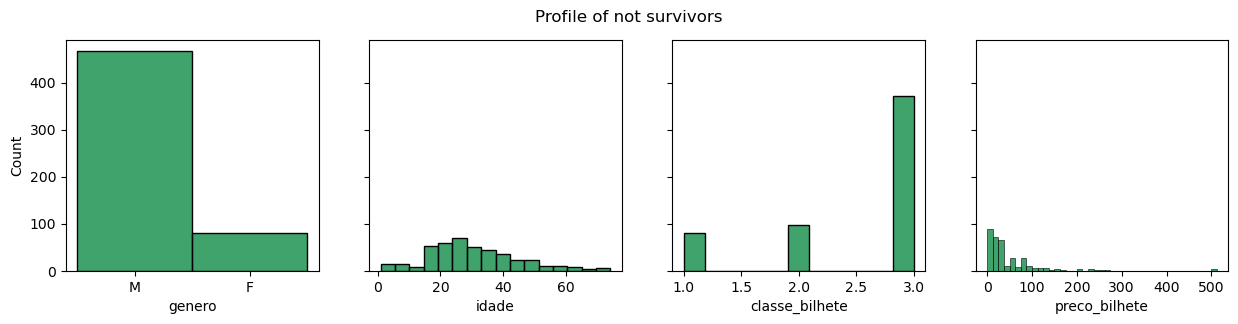

In [311]:
survived = df.query('sobreviveu == True').loc[:,['genero', 'idade', 'classe_bilhete', 'preco_bilhete']]
not_survived = df.query('sobreviveu == False').loc[:,['genero', 'idade', 'classe_bilhete', 'preco_bilhete']]

fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharey=True)
fig.suptitle('Profile of survivors')
sns.histplot(ax=axes[0], x="genero", data=survived, color="#00853B")
sns.histplot(ax=axes[1], x="idade", data=survived, color="#00853B")
sns.histplot(ax=axes[2], x="classe_bilhete", data=survived, color="#00853B")
sns.histplot(ax=axes[3], x="preco_bilhete", data=survived, color="#00853B")
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharey=True)
fig.suptitle('Profile of not survivors')
sns.histplot(ax=axes[0], x="genero", data=not_survived, color="#00853B")
sns.histplot(ax=axes[1], x="idade", data=not_survived, color="#00853B")
sns.histplot(ax=axes[2], x="classe_bilhete", data=not_survived, color="#00853B")
sns.histplot(ax=axes[3], x="preco_bilhete", data=survived, color="#00853B")
plt.show()

## Predições com Modelo ML

In [312]:
# Reimportando o conjunto de dados
df = pd.read_csv("titanic.csv").set_index("id_passageiro")
df.head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,numero_bilhete,preco_bilhete,cabine_numero,local_embarque
id_passageiro,,,,,,,,,,
1,False,3,M,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,True,1,F,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,True,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,True,1,F,35.0,1,0,113803,53.1000,C123,Southampton
5,False,3,M,35.0,0,0,373450,8.0500,NaN,Southampton


**Pré-processamento**

Criação da coluna Convés a partir da coluna cabine numero e remoção da coluna cabine_numero

In [315]:
df_conves = df[df['cabine_numero'].notna()]
df_conves = df_conves['cabine_numero'].apply(lambda x: x[0])
df_conves = pd.DataFrame.from_records(df_conves.values, columns=['conves'])
df_conves.head()

,conves
0,C
1,C
2,E
3,G
4,C


Remoção das colunas cabine_numero, numero_bilhete e local_embarque.

In [316]:
df.pop('cabine_numero')
df.pop('numero_bilhete')
df.pop('local_embarque')
df.head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete
id_passageiro,,,,,,,
1,False,3,M,22.0,1,0,7.2500
2,True,1,F,38.0,1,0,71.2833
3,True,3,F,26.0,0,0,7.9250
4,True,1,F,35.0,1,0,53.1000
5,False,3,M,35.0,0,0,8.0500


Merge com a coluna conves criada.

In [317]:
df = df.assign(conves=df_conves)
df.head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete,conves
id_passageiro,,,,,,,,
1,False,3,M,22.0,1,0,7.2500,C
2,True,1,F,38.0,1,0,71.2833,E
3,True,3,F,26.0,0,0,7.9250,G
4,True,1,F,35.0,1,0,53.1000,C
5,False,3,M,35.0,0,0,8.0500,D


Codificação dos dados da coluna sobreviveu.

In [318]:
df['sobreviveu'] = df['sobreviveu'].replace([False, True], [0, 1])
df.head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete,conves
id_passageiro,,,,,,,,
1,0,3,M,22.0,1,0,7.2500,C
2,1,1,F,38.0,1,0,71.2833,E
3,1,3,F,26.0,0,0,7.9250,G
4,1,1,F,35.0,1,0,53.1000,C
5,0,3,M,35.0,0,0,8.0500,D


Codificando os dados de genero.

In [319]:
df['genero'] = df['genero'].replace(['M', 'F'], [0, 1])
df.head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete,conves
id_passageiro,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,C
2,1,1,1,38.0,1,0,71.2833,E
3,1,3,1,26.0,0,0,7.9250,G
4,1,1,1,35.0,1,0,53.1000,C
5,0,3,0,35.0,0,0,8.0500,D


Codificação dos dados da coluna conves.

In [320]:
df['conves'] = df['conves'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], [0, 1, 2, 3, 4, 5, 6, 7])
df.head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete,conves
id_passageiro,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2.0
2,1,1,1,38.0,1,0,71.2833,4.0
3,1,3,1,26.0,0,0,7.9250,6.0
4,1,1,1,35.0,1,0,53.1000,2.0
5,0,3,0,35.0,0,0,8.0500,3.0


Tratamento dos dados faltantes na coluna conves, usando imputação por mediana.

In [321]:
df['conves'] = df['conves'].fillna(df['conves'].median())
df[df['conves'].isna()]

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete,conves
id_passageiro,,,,,,,,


Tratamento dos dados faltantes na coluna idade, usando imputação por média.

In [322]:
df['idade'] = df['idade'].fillna(df['idade'].mean())
df[df['idade'].isna()]

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete,conves
id_passageiro,,,,,,,,


Tratamento de outliers.

In [323]:
df.drop(outliers)

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete,conves
id_passageiro,,,,,,,,
1,0,3,0,22.000000,1,0,7.2500,2.0
2,1,1,1,38.000000,1,0,71.2833,4.0
3,1,3,1,26.000000,0,0,7.9250,6.0
4,1,1,1,35.000000,1,0,53.1000,2.0
5,0,3,0,35.000000,0,0,8.0500,3.0
...,...,...,...,...,...,...,...,...
887,0,2,0,27.000000,0,0,13.0000,2.0
888,1,1,1,19.000000,0,0,30.0000,2.0
889,0,3,1,29.699118,1,2,23.4500,2.0


Normalização das colunas preco_bilhete e idade.

In [324]:
def normalize(data):
  return (data-data.min())/(data.max()-data.min())

df['idade'] = normalize(df['idade'].values)
df['preco_bilhete'] = normalize(df['preco_bilhete'].values)

Definição dos dados de entrada e saída.

In [325]:
X = df
y = df.pop('sobreviveu')

Importação das funções a serem utilizadas.

In [326]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score

Importação dos modelos a serem utilizados.

In [327]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

Definição dos dados de treino e teste.

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Instanciação de cada modelo.

In [334]:
def classification(X_train, X_test, y_train, y_test):
  models = {}
  results = {'Model':[], 'Accuracy':[], 'Precision':[]}

  models['DecisionTreeClassifier'] = {'Model':DecisionTreeClassifier(), 'Result': None}
  models['RandomForestClassifier'] = {'Model':RandomForestClassifier(), 'Result': None}
  models['LogisticRegression'] = {'Model':LogisticRegression(), 'Result': None}
  models['XGBClassifier'] = {'Model':XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic'), 'Result': None}
  models['NaiveBayes'] = {'Model':GaussianNB(), 'Result': None}

  for name, _ in models.items():
    model = models[name]['Model']
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    models[name]['Result'] = predictions

    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(predictions, y_test))
    results['Precision'].append(precision_score(predictions, y_test))

  return results, models

results, models = classification(X_train, X_test, y_train, y_test)

In [335]:
results = pd.DataFrame(results)
results

,Model,Accuracy,Precision
0,DecisionTreeClassifier,0.735426,0.696629
1,RandomForestClassifier,0.811659,0.719101
2,LogisticRegression,0.798206,0.696629
3,XGBClassifier,0.780269,0.719101
4,NaiveBayes,0.780269,0.707865


## Perguntas do Desafio  - Modelo:

#### Quais etapas de processamento foram realizadas e o porquê de cada uma?
- Responda de maneira superficial uma vez que você já mostrou via código o que foi feito, quais as etapas do seu dado desde que ele é carregado pelo pandas até ser fornecido ao modelo durante o treinamento.

**Etapas realizadas:**
- Preprocessamento
  - Remoção de colunas desnecessárias
  - Criação de novas features
  - Codificação das colunas nominais
  - Tratamento de dados faltantes
  - Tratamento de outliers
  - Normalização de dados
- Modelos
  - Instanciação dos modelos a serem utilizados da lib ScikitLearn
  - Treinamento dos modelos
  - Aquisição das métricas

#### Dos modelos testados qual foi melhor? Porque? Apresenta as métricas do seu melhor modelo.
- Sabendo que você testou pelo menos 2 modelos diferentes, como você definiu o que é o melhor e qual é o melhor.

O melhor modelo foi o RandomForestClassifier. Este modelo foi o melhor dada a sua adaptabilidade ao conjunto de dados utilizando n árvores e, para cada uma, fazendo um processamento condicional chegando a uma classificação e ao final comparando as classificações de todas as árvores e a com mais "votos", sendo definida como o resultado final.

#### Seu  melhor modelo comete erros? Quais os pontos fracos dele?
- Saber os pontos fracos de seu modelo é crucial durante o seu uso, tente identificar com uma matriz confusão onde o seu modelo erra e o perfil do dado que ele erra.

RandomForestClassifier


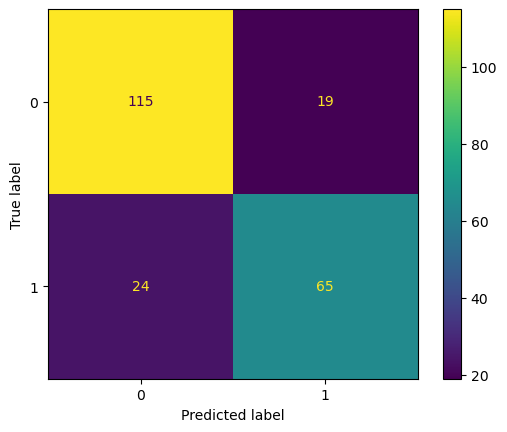

In [331]:
def plot_confusion_matrix(y_test, name, model_y_pred):
  print(name)
  ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, model_y_pred)).plot()
  plt.show()

# for name, model in models.items():
#   plot_confusion_matrix(y_test, name, models[name]['Model'], models[name]['Result'])

name = 'RandomForestClassifier'
plot_confusion_matrix(y_test, name, models[name]['Result'])